<a href="https://colab.research.google.com/github/bhavyasathvika/bhavyasathvika/blob/main/BATCH_12_SRP_COLAB_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spamraw (1).csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [ ]:
spam_messages = df[df["type"]=="spam"]
spam_messages.head()

,type,text
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
8,spam,Marvel Mobile Play the official Ultimate Spide...
19,spam,U can WIN £100 of Music Gift Vouchers every we...
34,spam,U have won a nokia 6230 plus a free digital ca...


In [ ]:
spam_messages.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


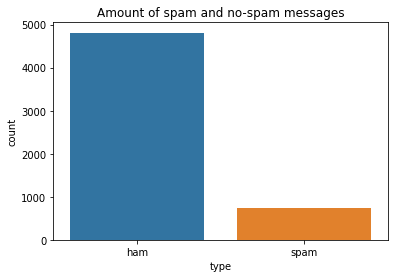

In [ ]:
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(df.text,df.type,test_size=0.2,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (4447,) (4447,)
data_test, labels_test:  (1112,) (1112,)


In [ ]:
vectorizer = CountVectorizer()
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

In [ ]:
clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9901079136690647


In [ ]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[979   0]
 [ 11 122]]


In [ ]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       979
        spam       1.00      0.92      0.96       133

    accuracy                           0.99      1112
   macro avg       0.99      0.96      0.98      1112
weighted avg       0.99      0.99      0.99      1112

